# I.2 Chaînes de Markov

## I.2.a Matrices de transition

In [1]:
import numpy as np

# Chargement de la matrice de transition en anglais
bigramenglish = np.loadtxt('bigramenglish.txt')

In [2]:
# Création du dictionnaire
dic={1:' ',
    2:'a',
    3 :'b',
    4 :'c',
    5 :'d',
    6 :'e',
    7 :'f',
    8 :'g',
    9 :'h',
    10:'i',
    11:'j',
    12:'k',
    13:'l',
    14:'m',
    15:'n',
    16:'o',
    17:'p',
    18:'q',
    19:'r',
    20:'s',
    21:'t',
    22:'u',
    23:'v',
    24:'w',
    25:'x',
    26:'y',
    27:'z',
    28:' ',}

dic_inv = {v: k for k, v in dic.items()}

Les probabilités de la première ligne de la matrice de transition correspondent aux probabilités de passer aux 28 états à partir de l'état initial "espace de début de mot".  
Les probabilités de la dernière colonne correspondent aux probabilités de transitionner depuis un état donné vers l'état final "espace de fin de mot".

In [3]:
for i, val in enumerate(dic.values()):
    print(f"Transition la plus fréquente depuis {val} : {np.argmax(bigramenglish[i])} soit {dic[np.argmax(bigramenglish[i])+1]}")

Transition la plus fréquente depuis   : 20 soit t
Transition la plus fréquente depuis a : 14 soit n
Transition la plus fréquente depuis b : 5 soit e
Transition la plus fréquente depuis c : 15 soit o
Transition la plus fréquente depuis d : 27 soit  
Transition la plus fréquente depuis e : 27 soit  
Transition la plus fréquente depuis f : 27 soit  
Transition la plus fréquente depuis g : 27 soit  
Transition la plus fréquente depuis h : 5 soit e
Transition la plus fréquente depuis i : 14 soit n
Transition la plus fréquente depuis j : 15 soit o
Transition la plus fréquente depuis k : 27 soit  
Transition la plus fréquente depuis l : 5 soit e
Transition la plus fréquente depuis m : 5 soit e
Transition la plus fréquente depuis n : 27 soit  
Transition la plus fréquente depuis o : 14 soit n
Transition la plus fréquente depuis p : 5 soit e
Transition la plus fréquente depuis q : 21 soit u
Transition la plus fréquente depuis r : 5 soit e
Transition la plus fréquente depuis s : 27 soit  
Transi

## I.2.b Générer un mot

In [4]:
def etat_suivant(mat,state):
    """Génère un nouvel état à partir d'une matrice de transitions et d'un état courant
    Arguments:
    - mat: np.array
    - state: int
    Returns: 
    - int"""
    # On crée la fonction de répartition à partir de la matrice "mat", pour l'état "state"
    f_repartition = np.cumsum(mat[state]) 
    # On génère un nombre aléatoire entre 0 et 1 
    rr = np.random.random() 
    # On cherche le premier index de la fonction de répartition duquel le nombre généré est inférieur : c'est l'état d'arrivée
    next_state = np.where(rr<=f_repartition)[-1][0] 
    # On renvoie cet état
    return next_state

etat_suivant(bigramenglish, 1)

12

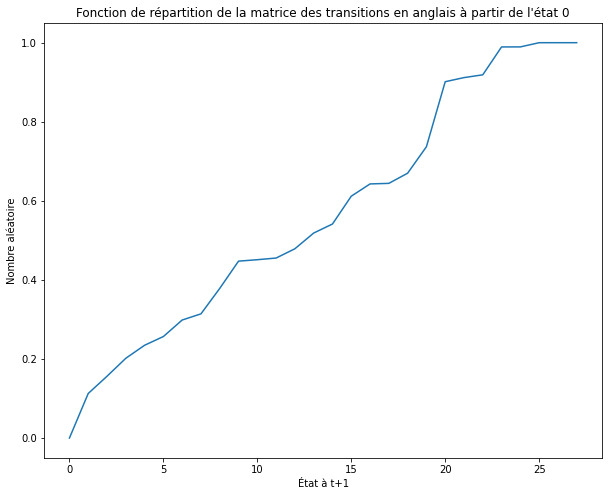

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(np.cumsum(bigramenglish[0]))
plt.ylabel("Nombre aléatoire")
plt.xlabel("État à t+1")
plt.title("Fonction de répartition de la matrice des transitions en anglais à partir de l'état 0")
plt.show()

L'abscisse de la courbe pour le nombre généré aléatoirement en ordonnée correspond à l'état d'arrivée dans notre fonction `etat_suivant`.

In [6]:
def generate_state_seq(mat):
    """Génère une séquence d'états à partir d'une matrice de transitions
    Arguments:
    - mat: np.array
    Returns:
    - list"""
    # On initialise la séquence à l'état initial
    states = [0]
    # Tant que le dernier état généré n'est pas l'état final
    while states[-1] != mat.shape[0]-1:
        # On génère un nouvel état à partir du dernier état généré
        state = etat_suivant(mat, states[-1])
        # On l'ajoute à la liste des états générés
        states.append(state)
    # On renvoie la séquence générée
    return states

def display_seq(seq, dic):
    """Transforme une séquence d'états en séquence de strings
    Arguments:
    - seq: list
    - dic: dict
    Returns:
    - string"""
    # Pour chaque état dans la liste, on cherche la string correspondante dans le dictionnaire
    # Puis on concatène toutes les strings
    return "".join([dic[state+1] for state in seq])

# On génère 5 exemples de mots
for _ in range(5):
    print(display_seq(generate_state_seq(bigramenglish), dic))

 tire 
 sad 
 ie 
 cis 
 ppubre 


In [7]:
def modifie_mat_dic(mat, dic):
    """Modifie une matrice de transitions et le dictionnaire associé pour ajouter un état final de phrase
    Arguments:
    - mat: np.array
    - dic: dict
    Returns:
    - np.array, dict, dict"""
    # On ajoute une colonne de zéros qui correspondra aux probabilités de transitionner vers l'état final de phrase
    new_mat = np.concatenate((mat,np.zeros((mat.shape[0],1))), axis=1)
    # On ajoute une ligne de zéros qui correspondra aux probabilités de transitionner depuis l'état final de phrase
    new_mat = np.concatenate((new_mat, np.zeros((1,new_mat.shape[1]))))
    # On passe la ligne correspondant à l'état final de mot à 0
    new_mat[-2] = np.zeros_like(new_mat[-2])
    # La probabilité de transitionner depuis l'état final de mot à l'état final de phrase est .1
    new_mat[-2,-1] = .1
    # La probabilité de transitionner depuis l'état final de mot à l'état initial de mot est .9
    new_mat[-2, 0] = .9
    # La probabilité de transitionner depuis l'état final de phrase vers lui-même est 1
    new_mat[-1,-1] = 1
    # On crée une copie du dictionnaire fourni
    new_dic = dic.copy()
    # On ajoute l'item correspondant à l'état final de phrase
    new_dic[29] = "."
    # On recrée le dictionnaire inverse
    new_dic_inv = {v: k for k, v in new_dic.items()}
    # On renvoie la nouvelle matrice de transitions, le nouveau dictionnaire et le nouveau dictionnaire inversé
    return new_mat, new_dic, new_dic_inv

# On utilise la fonction
new_bigramenglish, new_dic, new_dic_inv = modifie_mat_dic(bigramenglish, dic)
# On vérifie que la shape de la nouvelle matrice est correcte
new_bigramenglish.shape

(29, 29)

In [8]:
# On crée 5 exemples de séquences (phrases) à partir de cette matrice de transitions avec le même procédé que pour les mots
for _ in range(5):
    print(display_seq(generate_state_seq(new_bigramenglish), new_dic))

 dine  g  wan  unan  chiane  epe  mngembum .
 ro  re  to  ctofight  ad  be  dendosntouced  ianco  ththhorappout  de  whagexch  k  wof  tinore  card  howivam  dongued  atreeathe  ngr  thersof  tyomaticherco  ieyly  ld  geng .
 d  amecofo  tof .
 ond  vis  the  tis  ty  cured  tor  e  merofolvis  pichaviouffidean  nthestherey  hand  itus .
 goler  othinily  d  hansed  ios  nas  s .


## I.3 Reconnaissance de la langue

In [9]:
# On charge la matrice des transitions en français
bigramfrench = np.loadtxt("bigramfrancais.txt")
# On visualise les probabilités de transition depuis l'état initial
bigramfrench[0]

array([0.0000000e+00, 7.6216533e-02, 1.1725620e-02, 7.0353723e-02,
       2.0617549e-01, 6.7422318e-02, 2.1496971e-02, 1.0748485e-02,
       9.7713504e-04, 1.9542701e-02, 2.9314051e-03, 9.7713504e-05,
       1.7490717e-01, 1.6611296e-02, 6.5468048e-02, 1.8565566e-02,
       7.7193668e-02, 2.0519836e-02, 2.2474106e-02, 6.0582372e-02,
       1.3679891e-02, 3.4199726e-02, 6.8399453e-03, 9.7713504e-05,
       9.7713504e-05, 9.7713504e-05, 9.7713504e-04, 0.0000000e+00])

In [10]:
# On utilise la fonction modifie_mat_dic pour mettre à jour la matrice de transitions et le dictionnaire
# Remarque : on a ici remplacé l'espace de début et de fin de mot par - et + respectivement
dic_ll = dic.copy()
dic_ll[1] = "-"
dic_ll[28] = "+"
new_bigramfrench, dic_ll, dic_ll_inv = modifie_mat_dic(bigramfrench, dic_ll)

In [11]:
def calc_vraisemblance(seq, mat):
    """Calcule la vraisemblance d'une séquence à partir d'une matrice de transitions
    Arguments:
    - seq: string
    - mat: np.array
    Returns:
    - float"""
    # On fixe la probabilité de l'état initial à 1
    prob = 1
    # Pour chaque caractère dans la string, on multiplie la probabilité par la probabilité de transition de l'état t-1 vers l'état t
    for i, char in enumerate(seq[1:]):
        prob *= mat[dic_ll_inv[seq[i]]-1,dic_ll_inv[char]-1]
    # On renvoie la vraisemblance de la séquence
    return prob

print(f"Vraisemblance de 'to be or not to be' en anglais : {calc_vraisemblance('-to+-be+-or+-not+-to+-be+.', new_bigramenglish)}")
print(f"Vraisemblance de 'to be or not to be' en français : {calc_vraisemblance('-to+-be+-or+-not+-to+-be+.', new_bigramfrench)}")
print(f"Vraisemblance de 'etre ou ne pas etre' en anglais : {calc_vraisemblance('-etre+-ou+-ne+-pas+-etre+.', new_bigramenglish)}")
print(f"Vraisemblance de 'etre ou ne pas etre' en français : {calc_vraisemblance('-etre+-ou+-ne+-pas+-etre+.', new_bigramfrench)}")

Vraisemblance de 'to be or not to be' en anglais : 8.112892227809415e-20
Vraisemblance de 'to be or not to be' en français : 5.9602081018686406e-30
Vraisemblance de 'etre ou ne pas etre' en anglais : 4.462288711775253e-24
Vraisemblance de 'etre ou ne pas etre' en français : 1.145706887234789e-19


On remarque que la vraisemblance est cohérente avec la langue de ces phrases.

# II.2 Génération de séquences d'observation

In [12]:
# Chargement des matrices
import numpy as np
v = np.loadtxt("data_txt_compact\matrice_symboles.txt")
A0 = np.loadtxt("data_txt_compact\A0.txt")
A1 = np.loadtxt("data_txt_compact\A1.txt")
A7 = np.loadtxt("data_txt_compact\A7.txt")
B0 = np.loadtxt("data_txt_compact\B0.txt")
B1 = np.loadtxt("data_txt_compact\B1.txt")
B7 = np.loadtxt("data_txt_compact\B7.txt")
p0 = np.loadtxt(r"data_txt_compact\vect_pi0.txt")
p1 = np.loadtxt(r"data_txt_compact\vect_pi1.txt")
p7 = np.loadtxt(r"data_txt_compact\vect_pi7.txt")
A0

array([[ 0.84178118,  0.15821882, -0.        , -0.        , -0.        ],
       [-0.        ,  0.7886163 ,  0.2113837 , -0.        , -0.        ],
       [-0.        , -0.        ,  0.86339743,  0.13660257, -0.        ],
       [-0.        , -0.        , -0.        ,  0.79150194,  0.20849806],
       [-0.        , -0.        , -0.        , -0.        ,  1.        ]])

## II.2.1
Les zéros de la matrice B correspondent à des probabilités nulles qu'un état caché corresponde à un état observé.  
Les zéros de la matrice A correspondent à des probabilités de transition nulles entre deux états cachés.  
Les zéros du vecteur $\pi$ correspondent à des probabilités de transition nulles de l'état initial vers un état caché.

## II.2.2

Fonction de répartition de la ligne 0 de A0 : [0.84178118 1.         1.         1.         1.        ]


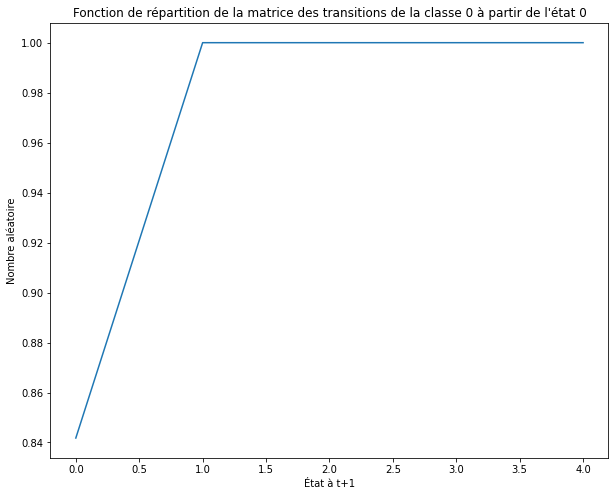

In [13]:
def etat_suivant(mat,state):
    """Génère un nouvel état à partir d'une matrice de transitions et d'un état courant
    Arguments:
    - mat: np.array
    - state: int
    Returns: 
    - int"""
    # On crée la fonction de répartition à partir de la matrice "mat", pour l'état "state"
    f_repartition = np.cumsum(mat[state]) 
    # On génère un nombre aléatoire entre 0 et 1 
    rr = np.random.random() 
    # On cherche le premier index de la fonction de répartitionduquel le nombre généré est inférieur : c'est l'état d'arrivée
    next_state = np.where(rr<=f_repartition)[-1][0] 
    # On renvoie cet état
    return next_state

print("Fonction de répartition de la ligne 0 de A0 :", np.cumsum(A0[0]))

plt.figure(figsize=(10,8))
plt.plot(np.cumsum(A0[0]))
plt.ylabel("Nombre aléatoire")
plt.xlabel("État à t+1")
plt.title("Fonction de répartition de la matrice des transitions de la classe 0 à partir de l'état 0")
plt.show()


Ci-dessus, on a la fonction de répartition de l'état caché 0 vers les autres états cachés. On génère un nombre aléatoire entre 0 et 1, et on trouve le premier nombre de la fonction de répartition duquel le nombre généré est inférieur. Cela nous donne l'index de l'état suivant.  
Exemples d'après la fonction affichée ci-dessus :
- On tire 0.457. L'index du premier nombre dont on est inférieur est 0. L'état t+1 est donc 0.
- On tire 0.952. L'index du premier nombre dont on est inférieur est 1. L'état t+1 est donc 1.

## II.2.3 - II.2.4

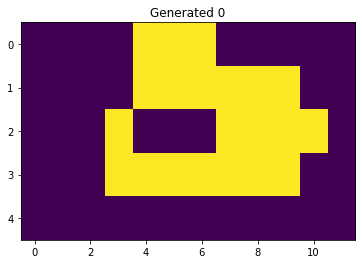

In [14]:
# On crée une liste vide d'observations
obs = list()
# On trouve le premier état grâce à la fonction de répartition de pi
state = np.where(np.random.random()<=np.cumsum(p0))[-1][0]
# On génère une observation pour cet état grâce à la matrice de transitions B et le dictionnaire de correspondances v
obs.append(v.T[etat_suivant(B0.T,state)])
# Tant que le dernier état généré ne correspond pas à l'état final
while state != A0.shape[1]-1:
    # On génère un nouvel état
    state = etat_suivant(A0, state)
    # On génère une observation à partir de cet état
    obs.append(v.T[etat_suivant(B0.T,state)])

# On visualise l'image de la séquence générée
obs = np.array(obs)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(obs.T)
ax.set_aspect('auto')
plt.title("Generated 0")
plt.show()

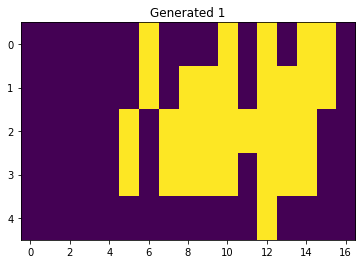

In [15]:
# Même procédé pour générer un 1
obs = list()
state = np.where(np.random.random()<=np.cumsum(p1))[-1][0]
obs.append(v.T[etat_suivant(B1.T,state)])
while state != A1.shape[1]-1:
    state = etat_suivant(A1, state)
    obs.append(v.T[etat_suivant(B1.T,state)])


obs = np.array(obs)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(obs.T)
ax.set_aspect('auto')
plt.title("Generated 1")
plt.show()

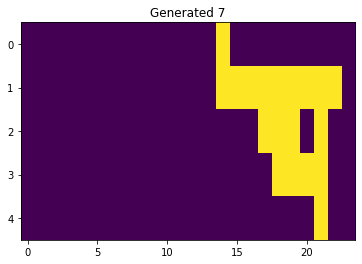

In [16]:
# Même procédé pour générer un 7
obs = list()
state = np.where(np.random.random()<=np.cumsum(p7))[-1][0]
obs.append(v.T[etat_suivant(B7.T,state)])
while state != A7.shape[1]-1:
    state = etat_suivant(A7, state)
    obs.append(v.T[etat_suivant(B7.T,state)])
    
    
obs = np.array(obs)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(obs.T)
ax.set_aspect('auto')
plt.title("Generated 7")
plt.show()

## II.3 Calcul de la vraisemblance de séquences d'observations

In [17]:
# Chargement des observations
test0 = np.loadtxt("data_txt_compact/SeqTest0.txt")
test1 = np.loadtxt("data_txt_compact/SeqTest1.txt")
test7 = np.loadtxt("data_txt_compact/SeqTest7.txt")

In [18]:
# On génère un jeu de données sous la forme X (features), y (targets)
# Cela facilitera la classification par la suite
X = np.concatenate((test0, test1, test7))
y = [0 for _ in range(len(test0))] + [1 for _ in range(len(test1))] + [7 for _ in range(len(test7))]

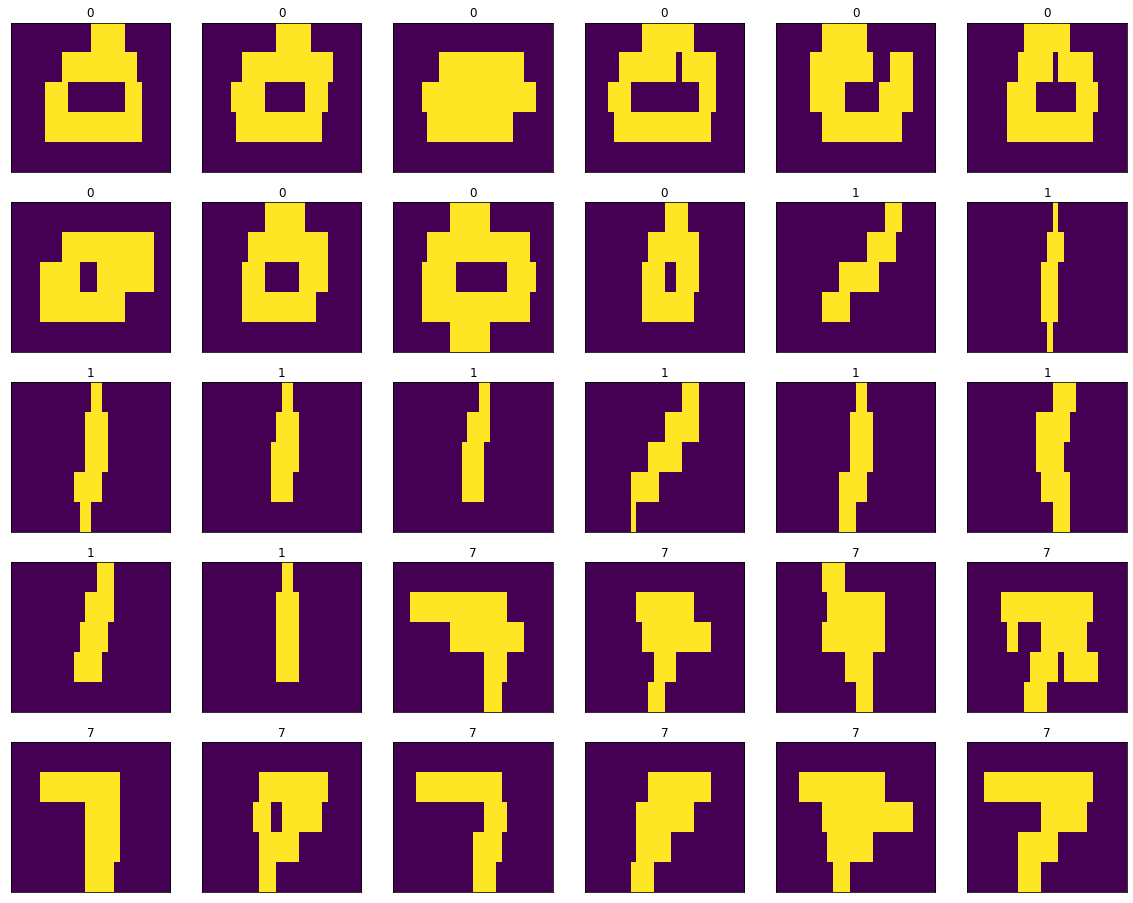

In [19]:
# On visualise les données
fig = plt.figure(figsize=(20,16))
for i, row in enumerate(X):
    obs = v.T[row.astype(int)-1]
    ax = fig.add_subplot(5,6,i+1)
    ax.imshow(obs.T)
    ax.set_aspect('auto')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(y[i])
plt.show()

In [20]:
# On transforme les matrices de transitions et le vecteur pi en logarithmes
A0_log = np.log(A0)
A1_log = np.log(A1)
A7_log = np.log(A7)
B0_log = np.log(B0)
B1_log = np.log(B1)
B7_log = np.log(B7)
p0_log = np.log(p0)
p1_log = np.log(p1)
p7_log = np.log(p7)

<ipython-input-20-0c7fcdc3f4e0>:2: RuntimeWarning: divide by zero encountered in log
  A0_log = np.log(A0)
<ipython-input-20-0c7fcdc3f4e0>:3: RuntimeWarning: divide by zero encountered in log
  A1_log = np.log(A1)
<ipython-input-20-0c7fcdc3f4e0>:4: RuntimeWarning: divide by zero encountered in log
  A7_log = np.log(A7)
<ipython-input-20-0c7fcdc3f4e0>:5: RuntimeWarning: divide by zero encountered in log
  B0_log = np.log(B0)
<ipython-input-20-0c7fcdc3f4e0>:6: RuntimeWarning: divide by zero encountered in log
  B1_log = np.log(B1)
<ipython-input-20-0c7fcdc3f4e0>:7: RuntimeWarning: divide by zero encountered in log
  B7_log = np.log(B7)
<ipython-input-20-0c7fcdc3f4e0>:8: RuntimeWarning: divide by zero encountered in log
  p0_log = np.log(p0)
<ipython-input-20-0c7fcdc3f4e0>:9: RuntimeWarning: divide by zero encountered in log
  p1_log = np.log(p1)
<ipython-input-20-0c7fcdc3f4e0>:10: RuntimeWarning: divide by zero encountered in log
  p7_log = np.log(p7)


In [21]:
def viterbi(y, pi, A, B, log=True):
    """Calcule la vraisemblance selon viterbi et la séquence la plus probable d'états cachés
    Arguments:
    - y: np.array of ints
    - pi: np.array
    - A: np.array
    - B: np.array
    - log: bool
    Returns:
    - float, np.array"""

    # On génère les matrices T1 et T2 vides
    T1 = np.empty((A.shape[0], y.shape[0]))
    T2 = np.empty((A.shape[0], y.shape[0]))

    # Si les matrices sont en log
    if log:
        # On calcule la probabilité de la première observation
        T1[:, 0] = pi + B[y[0]-1,:]
        # L'état initial est forcément 0
        T2[:, 0] = 0
        # Pour chaque observation dans la séquence
        for j in range(1,y.shape[0]):
            # Pour chaque état possible
            for i in range(A.shape[0]):
                # On calcule la probabilité maximale de chaque état caché d'après les probabilités antérieures
                T1[i, j] = np.max(T1[:,j-1] + A[:,i] + B[y[j]-1,i])
                # On calcule l'état correspondant à ces probabilités maximales
                T2[i, j] = np.argmax(T1[:,j-1] + A[:,i] + B[y[j]-1,i])

    # Même procédé si les matrices ne sont pas en log, on multiplie plutôt que d'additionner
    else:
        T1[:, 0] = pi * B[y[0]-1,:]
        T2[:, 0] = 0
        for j in range(1,y.shape[0]):
            for i in range(A.shape[0]):
                T1[i, j] = np.max(T1[:,j-1] * A[:,i] * B[y[j]-1,i])
                T2[i, j] = np.argmax(T1[:,j-1] * A[:,i] * B[y[j]-1,i])     

    # On initialise la séquence la plus vraisemblable
    z = np.empty(y.shape[0])
    # Le dernier état correspond au dernier état le plus probable
    z[-1] = np.argmax(T1[:,-1])
    # On backtracke
    for j in range(y.shape[0]-1,-1,-1):
        z[j-1] = T2[z[j].astype(int),j]
    
    # La probabilité de la séquence correspond au maximum des probabilités de la dernière observation
    return np.max(T1[:,-1]), z

In [22]:
islog = True

# On initialise les listes de probabilités
probs_zero = list()
probs_one = list()
probs_seven = list()

# Pour chaque observation dans X, on calcule la vraisemblance d'appartenir à chaque classe
for obs in X:
    probs_zero.append(viterbi(obs.astype(int), p0_log, A0_log, B0_log, islog)[0])
    probs_one.append(viterbi(obs.astype(int), p1_log, A1_log, B1_log, islog)[0])
    probs_seven.append(viterbi(obs.astype(int), p7_log, A7_log, B7_log, islog)[0])

# On concatène les probabilités
# Puis on considère que l'argmax des probabilités correspond à la prédiction du modèle
preds = np.concatenate(([probs_zero], [probs_one], [probs_seven]), axis=0)
preds = np.argmax(preds, axis=0)
preds[preds==2] = 7
print(preds)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 7 7 1 7 7 7 7 7 7 7]


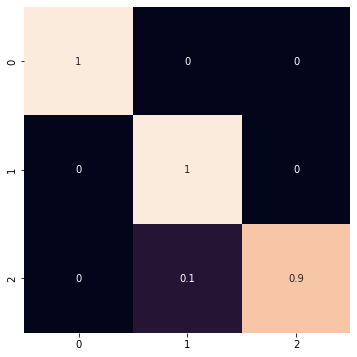

Accuracy : 0.9666666666666667


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y, preds, normalize="true"), annot=True, cbar=False, square=True)
plt.show()
print("Accuracy :", accuracy_score(y,preds))

In [24]:
# Même procédé sans utiliser le log
islog = False

# On initialise les listes de probabilités
probs_zero = list()
probs_one = list()
probs_seven = list()

# Pour chaque observation dans X, on calcule la vraisemblance d'appartenir à chaque classe
for obs in X:
    probs_zero.append(viterbi(obs.astype(int), p0, A0, B0, islog)[0])
    probs_one.append(viterbi(obs.astype(int), p1, A1, B1, islog)[0])
    probs_seven.append(viterbi(obs.astype(int), p7, A7, B7, islog)[0])

# On concatène les probabilités
# Puis on considère que l'argmax des probabilités correspond à la prédiction du modèle
preds = np.concatenate(([probs_zero], [probs_one], [probs_seven]), axis=0)
preds = np.argmax(preds, axis=0)
preds[preds==2] = 7
print(preds)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 7 7 1 7 7 7 7 7 7 7]


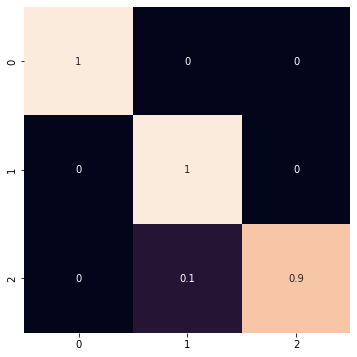

Accuracy : 0.9666666666666667


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y, preds, normalize="true"), annot=True, cbar=False, square=True)
plt.show()
print("Accuracy :", accuracy_score(y,preds))

On peut comparer notre classifieur avec un classifieur simple, par exemple une régression logistique.

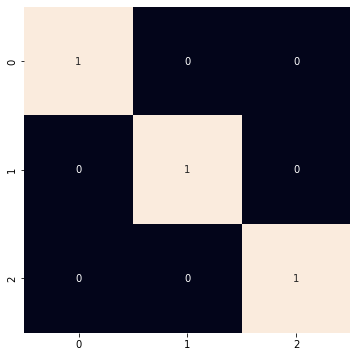

Accuracy : 1.0


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# On aplatit les images
X_logreg = list()
for row in X:
    X_logreg.append(v.T[row.astype(int)-1].flatten())
    
# On sépare les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X_logreg, y, test_size=.3, stratify=y)

# On entraîne le modèle sur le train, on prédit sur le test
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

# On évalue le modèle 
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, preds, normalize="true"), annot=True, cbar=False, square=True)
plt.show()
print("Accuracy :", accuracy_score(y_test,preds))